In [1]:
# Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset
df = pd.read_csv(r"C:\Users\ASUS\Downloads\data.csv",encoding="latin1")

In [3]:
# Display basic information
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# Checking missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])

Missing Values:
Description      1454
CustomerID     135080
dtype: int64


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# Handling missing values
df = df.dropna(subset=['CustomerID'])

In [8]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 406829, dtype: datetime64[ns]

In [9]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

## Q1. What is the total revenue generated

In [10]:
total_revenue = df['TotalPrice'].sum()
print(f"Total Revenue Generated: ${total_revenue:.2f}")

Total Revenue Generated: $8300065.81


## Q2. Which product has the highest sales?

In [11]:
top_product = df.groupby('Description')['Quantity'].sum().idxmax()
print(f"Best Selling Product: {top_product}")

Best Selling Product: WORLD WAR 2 GLIDERS ASSTD DESIGNS


## Q3. Which country generates the highest revenue?

In [12]:
top_country = df.groupby('Country')['TotalPrice'].sum().idxmax()
print(f"Country with Highest Revenue: {top_country}")

Country with Highest Revenue: United Kingdom


## Q4. What is the average order value (AOV)?

In [13]:
num_orders = df['InvoiceNo'].nunique()
average_order_value = total_revenue / num_orders
print(f"Average Order Value (AOV): ${average_order_value:.2f}")

Average Order Value (AOV): $374.05


## Q5. What is the distribution or order quantities?

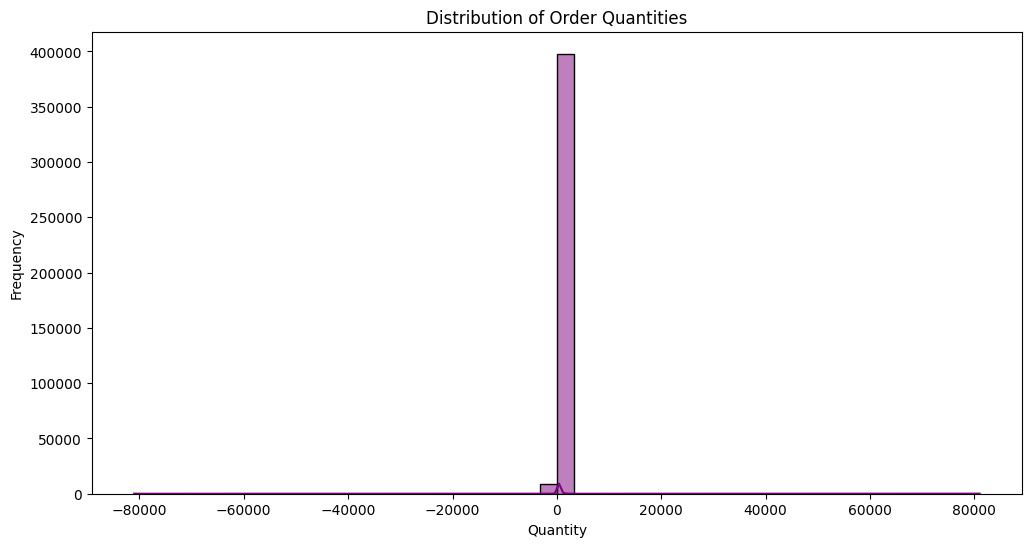

In [14]:
plt.figure(figsize=(12,6))
sns.histplot(df['Quantity'], bins=50, kde=True, color='purple')
plt.title("Distribution of Order Quantities")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

## Q6. How many unique products are there?

In [15]:
unique_products = df['Description'].nunique()
print(f"Unique products: {unique_products}")

Unique products: 3896


## Q7. who is the top spending customer?


In [16]:
top_customer = df.groupby('CustomerID')['TotalPrice'].sum().idxmax()
print(f"Top spending customer ID: {top_customer}")

Top spending customer ID: 14646.0


## Q8. What is the most common unit price?

In [17]:
common_price = df['UnitPrice'].mode()[0]
print(f"Most Common unit price: {common_price}")

Most Common unit price: 1.25


## Q9. What is the distribution of total spending per customer?

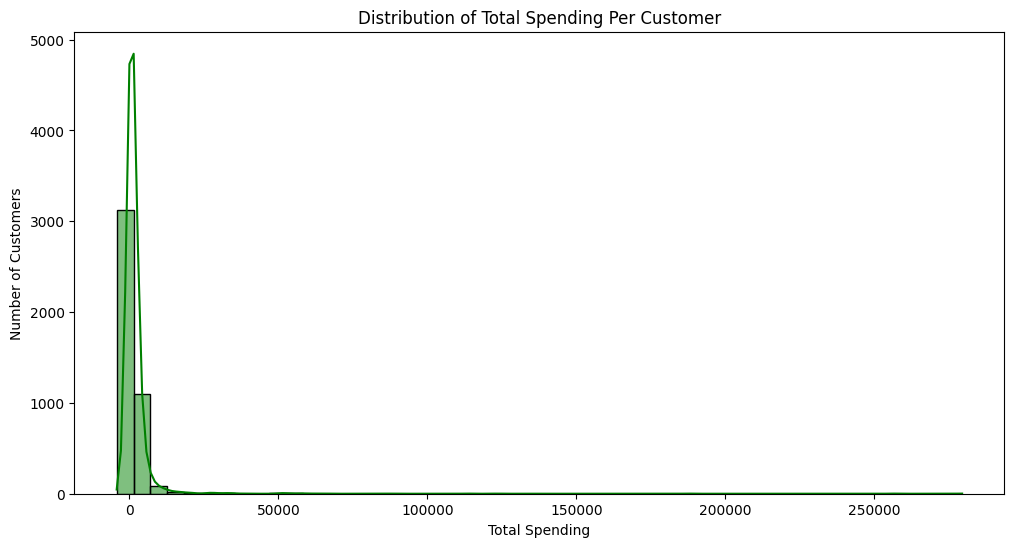

In [18]:
plt.figure(figsize=(12,6))
sns.histplot(df.groupby('CustomerID')['TotalPrice'].sum(), bins=50, kde=True, color='green')
plt.title("Distribution of Total Spending Per Customer")
plt.xlabel("Total Spending")
plt.ylabel("Number of Customers")
plt.show()

## Q10. What is the correlation between quantity and total price?

In [19]:
correlation = df[['Quantity', 'TotalPrice']].corr().iloc[0,1]
print(f"Correlation between Quantity and Total Price: {correlation:.2f}")

Correlation between Quantity and Total Price: 0.92


## Q11. What are the busiest months in terms of transactions?

In [20]:
df['Month'] = df['InvoiceDate'].dt.month
busiest_months = df['Month'].value_counts().index[:3].tolist()
print(f"Busiest months (Top 3): {busiest_months}")

Busiest months (Top 3): [12.0, 11.0, 10.0]


## Univariate Analysis

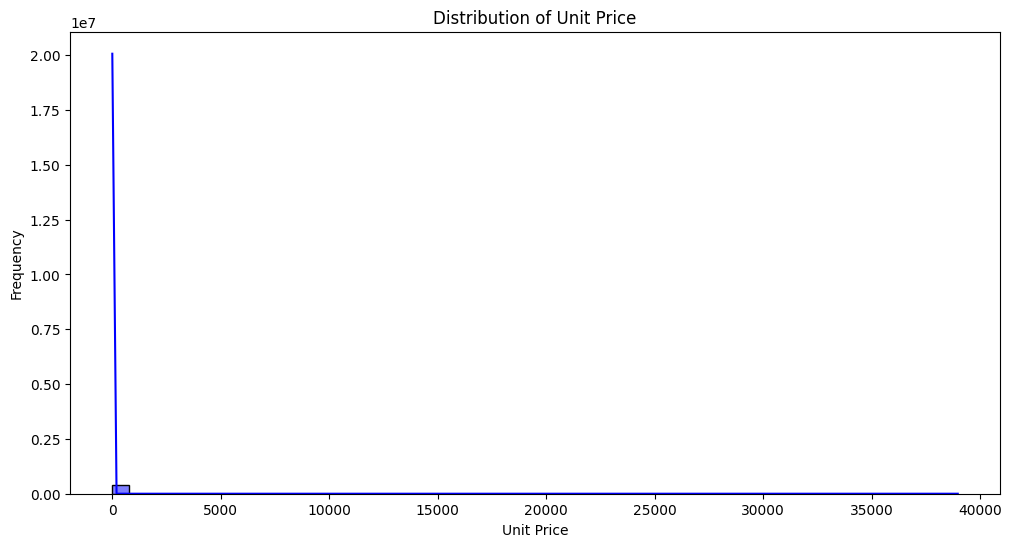

In [21]:
plt.figure(figsize=(12,6))
sns.histplot(df['UnitPrice'], bins=50, kde=True, color='blue')
plt.title("Distribution of Unit Price")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.show()

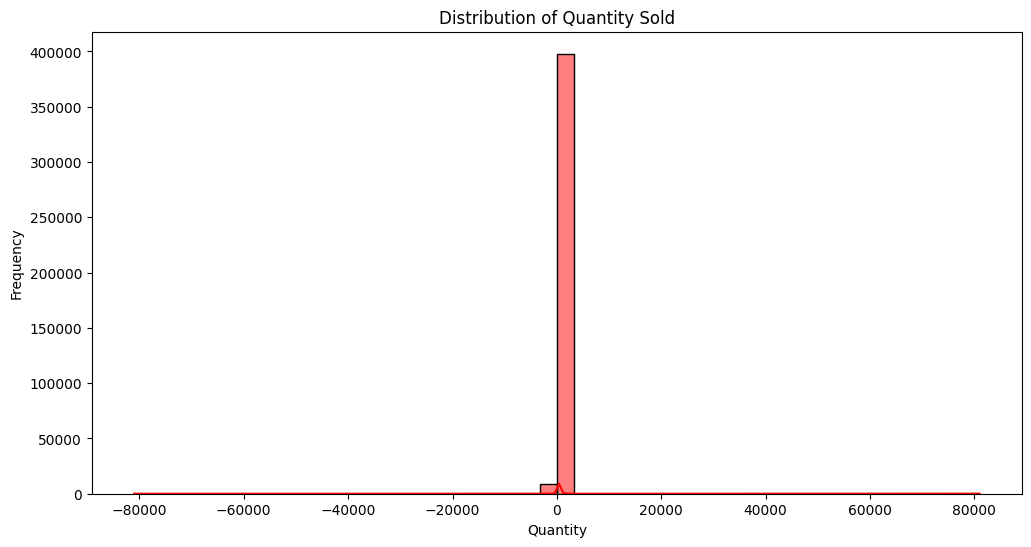

In [22]:
plt.figure(figsize=(12,6))
sns.histplot(df['Quantity'], bins=50, kde=True, color='red')
plt.title("Distribution of Quantity Sold")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

## Bivariate Analysis

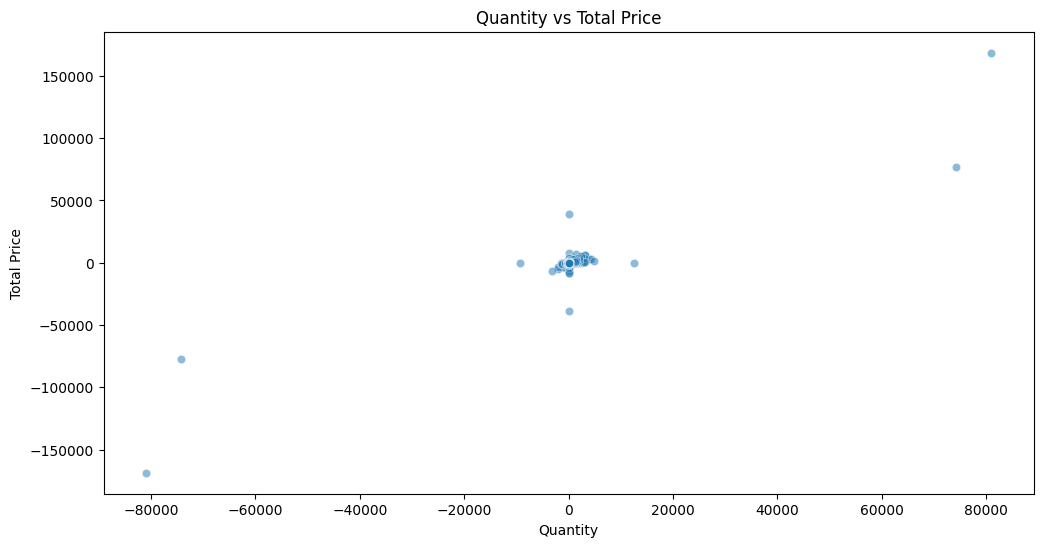

In [23]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Quantity'], y=df['TotalPrice'], alpha=0.5)
plt.title("Quantity vs Total Price")
plt.xlabel("Quantity")
plt.ylabel("Total Price")
plt.show()

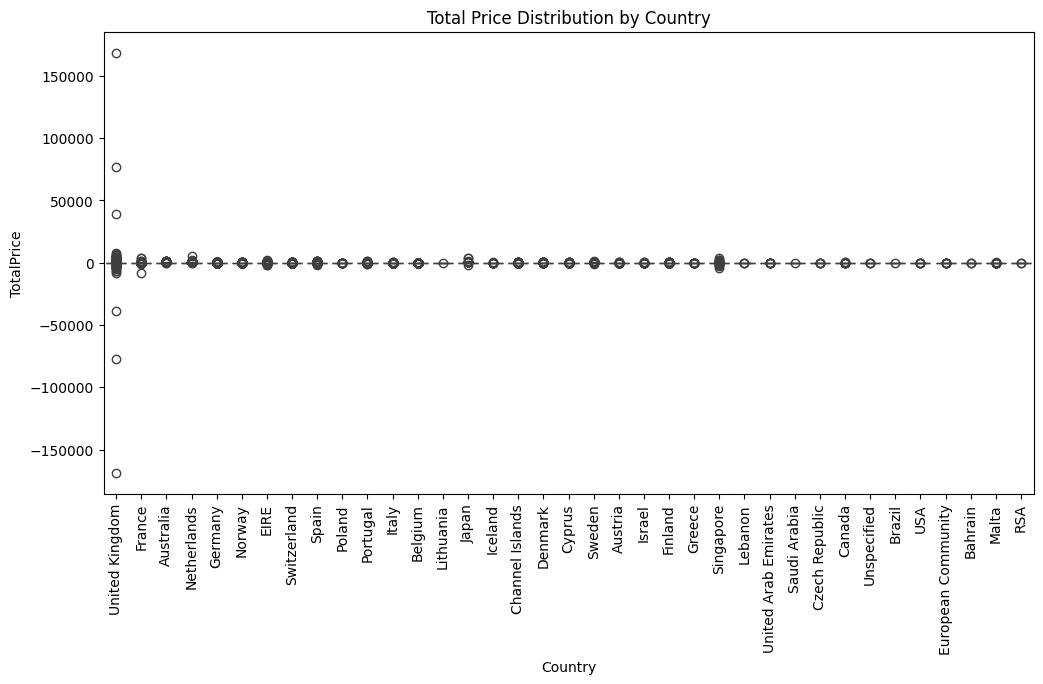

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['Country'], y=df['TotalPrice'])
plt.xticks(rotation=90)
plt.title("Total Price Distribution by Country")
plt.show()

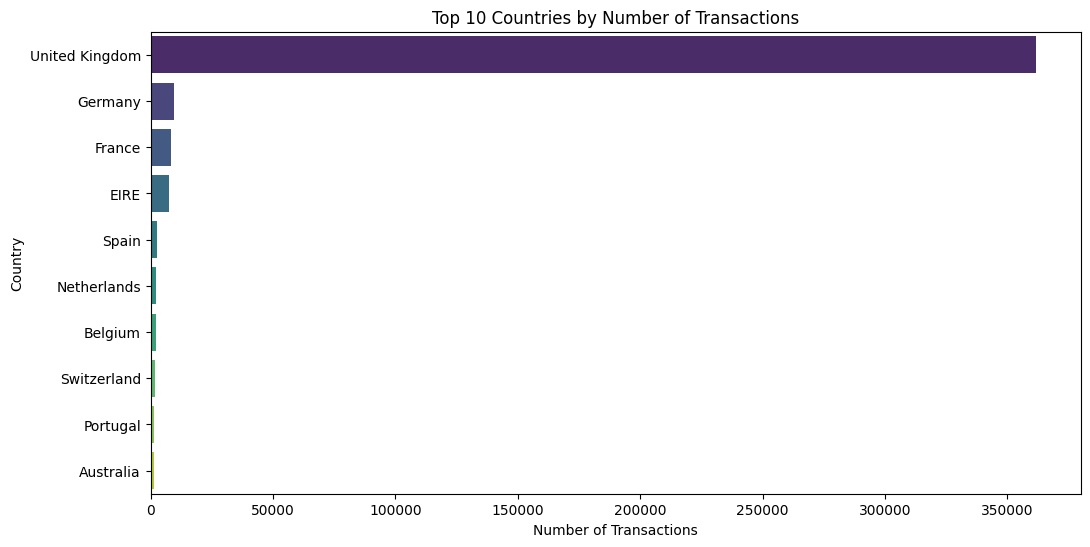

In [25]:
# Top 10 Countries by Transactions
plt.figure(figsize=(12,6))
sns.countplot(y=df['Country'], order=df['Country'].value_counts().index[:10], palette='viridis')
plt.title("Top 10 Countries by Number of Transactions")
plt.xlabel("Number of Transactions")
plt.ylabel("Country")
plt.show()

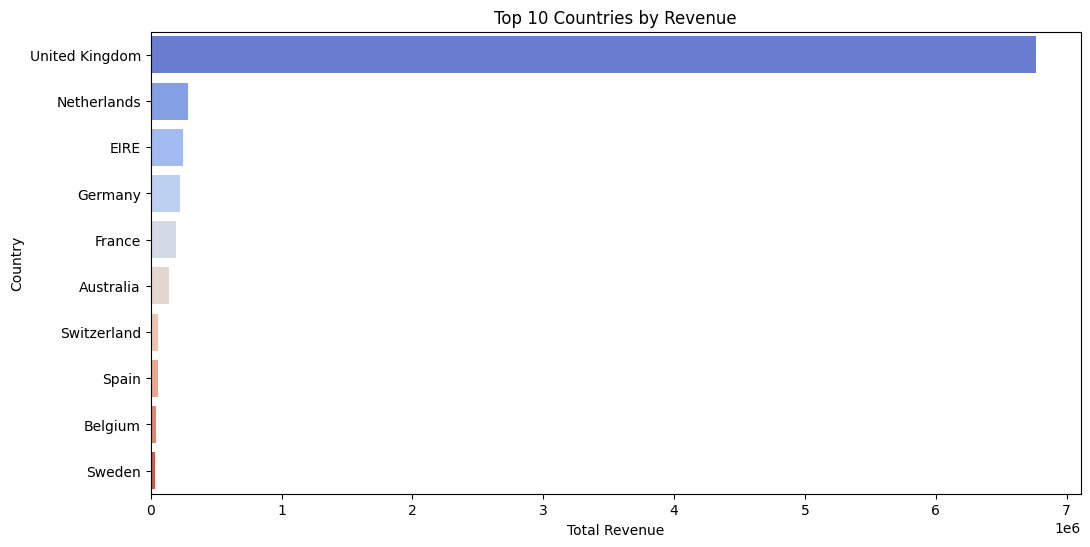

In [26]:
# Revenue Analysis by Country
revenue_by_country = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(12,6))
sns.barplot(x=revenue_by_country.values, y=revenue_by_country.index, palette='coolwarm')
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Country")
plt.show()

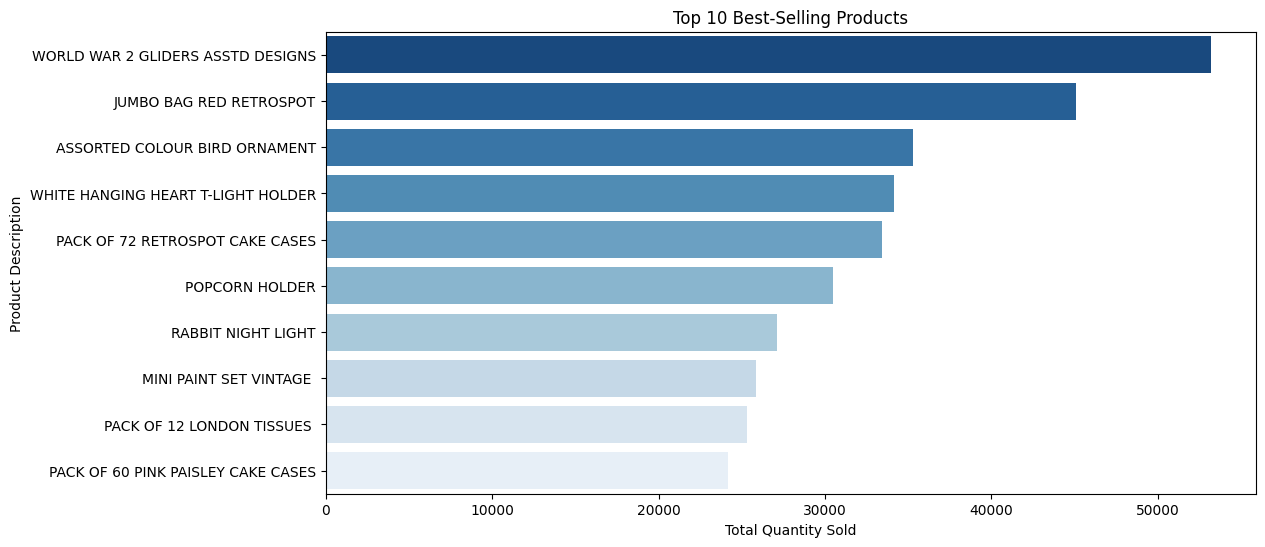

In [27]:
# Top 10 Best-Selling Products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='Blues_r')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Description")
plt.show()

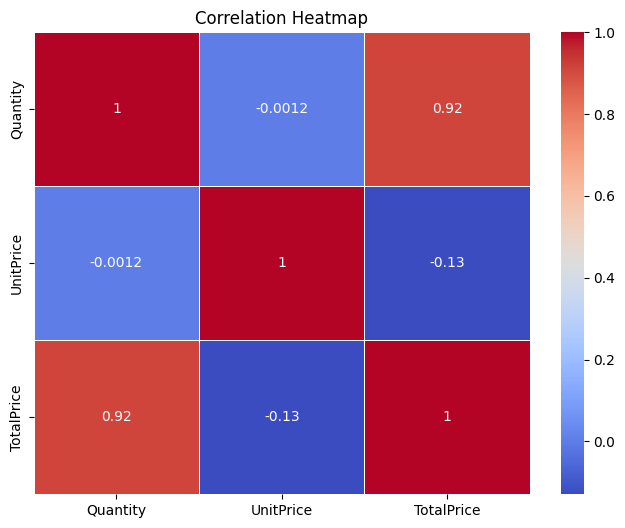

In [28]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['Quantity', 'UnitPrice', 'TotalPrice']].corr(), annot=True, cmap='coolwarm', linewidth=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Time Series Analysis

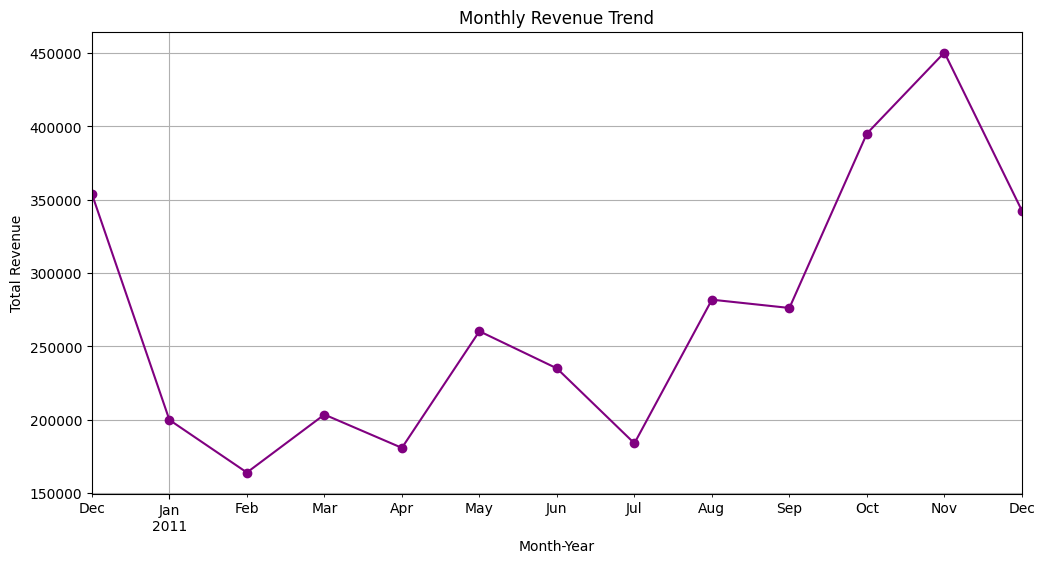

In [31]:
# Monthly Revenue Trend
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')
monthly_revenue = df.groupby('MonthYear')['TotalPrice'].sum()
plt.figure(figsize=(12,6))
monthly_revenue.plot(kind='line', marker='o', color='purple')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month-Year")
plt.ylabel("Total Revenue")
plt.grid()
plt.show()

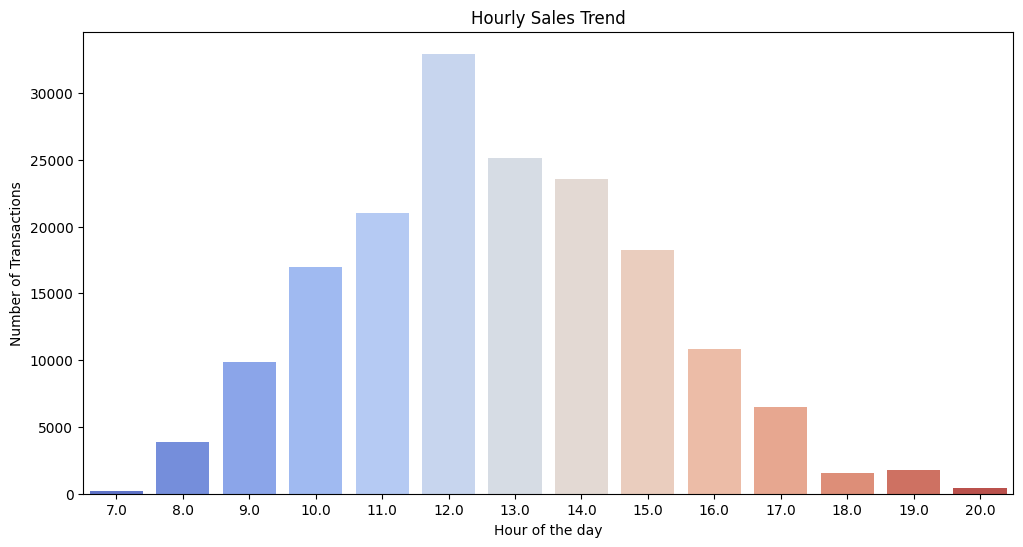

In [32]:
# Hourly Sales Trend
df['Hour'] = df['InvoiceDate'].dt.hour
plt.figure(figsize=(12,6))
sns.countplot(x=df['Hour'], palette='coolwarm')
plt.title("Hourly Sales Trend")
plt.xlabel("Hour of the day")
plt.ylabel("Number of Transactions")
plt.show()

## Customer Segmentation (RFM Analysis)

In [34]:
latest_date = df['InvoiceDate'].max()
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'InvoiceNo' : 'count',
    'TotalPrice': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
print(rfm.describe())

           Recency    Frequency       Monetary
count  3125.000000  4372.000000    4372.000000
mean    116.577920    93.053294    1898.459701
std     114.570174   232.471608    8219.345141
min       0.000000     1.000000   -4287.630000
25%      28.000000    17.000000     293.362500
50%      65.000000    42.000000     648.075000
75%     190.000000   102.000000    1611.725000
max     373.000000  7983.000000  279489.020000


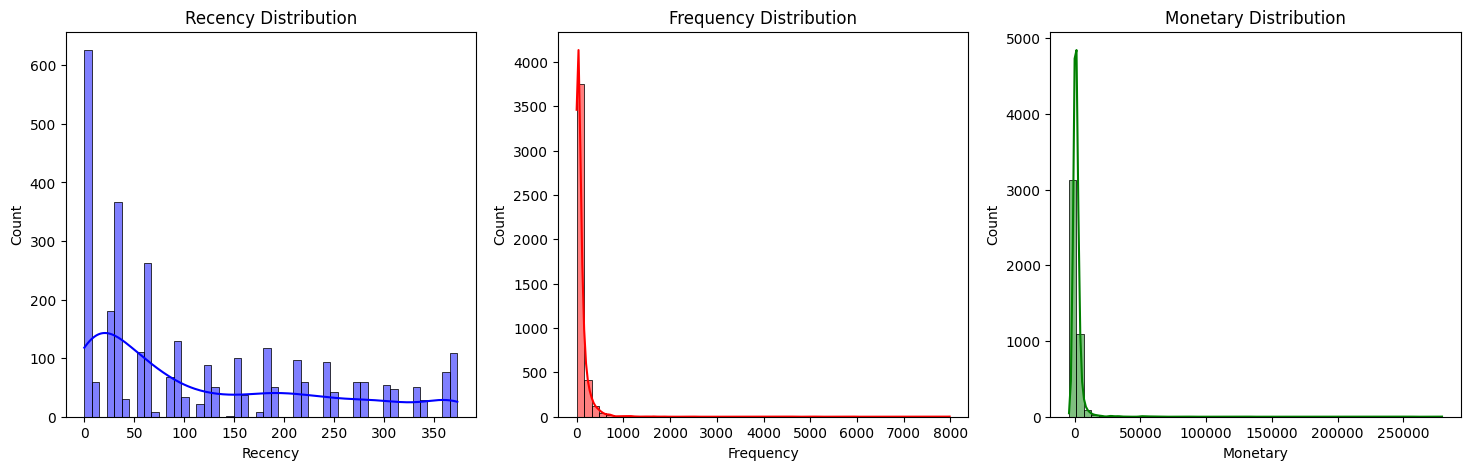

In [35]:
# Dsitribution of Recency, Frequency, and Monetary
fig, axes = plt.subplots(1, 3, figsize=(18,5))
sns.histplot(rfm['Recency'], bins=50, kde=True, ax=axes[0], color='blue')
axes[0].set_title("Recency Distribution")
sns.histplot(rfm['Frequency'], bins=50, kde=True, ax=axes[1], color='red')
axes[1].set_title("Frequency Distribution")
sns.histplot(rfm['Monetary'], bins=50, kde=True, ax=axes[2], color='green')
axes[2].set_title("Monetary Distribution")
plt.show()

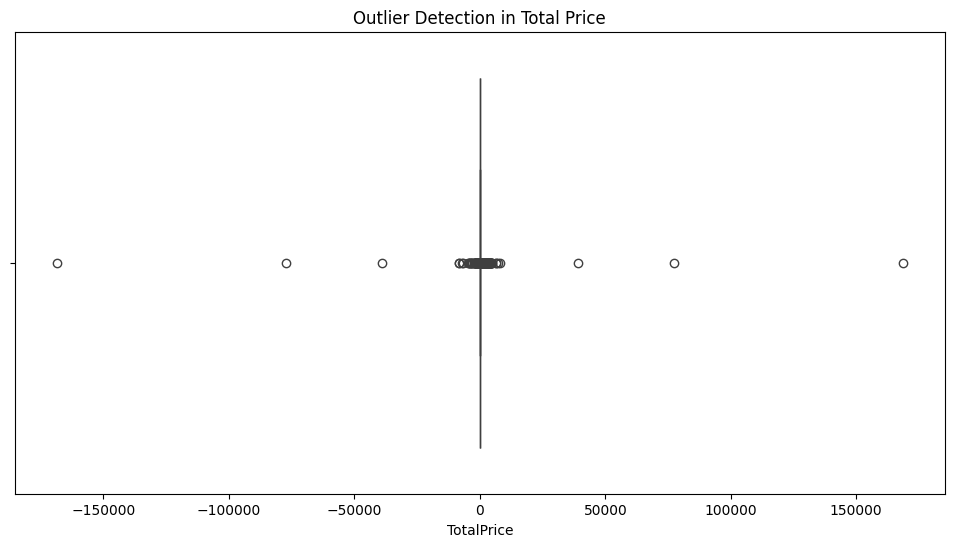

In [36]:
# Outlier Detection
plt.figure(figsize=(12,6))
sns.boxplot(x=df['TotalPrice'])
plt.title("Outlier Detection in Total Price")
plt.show()


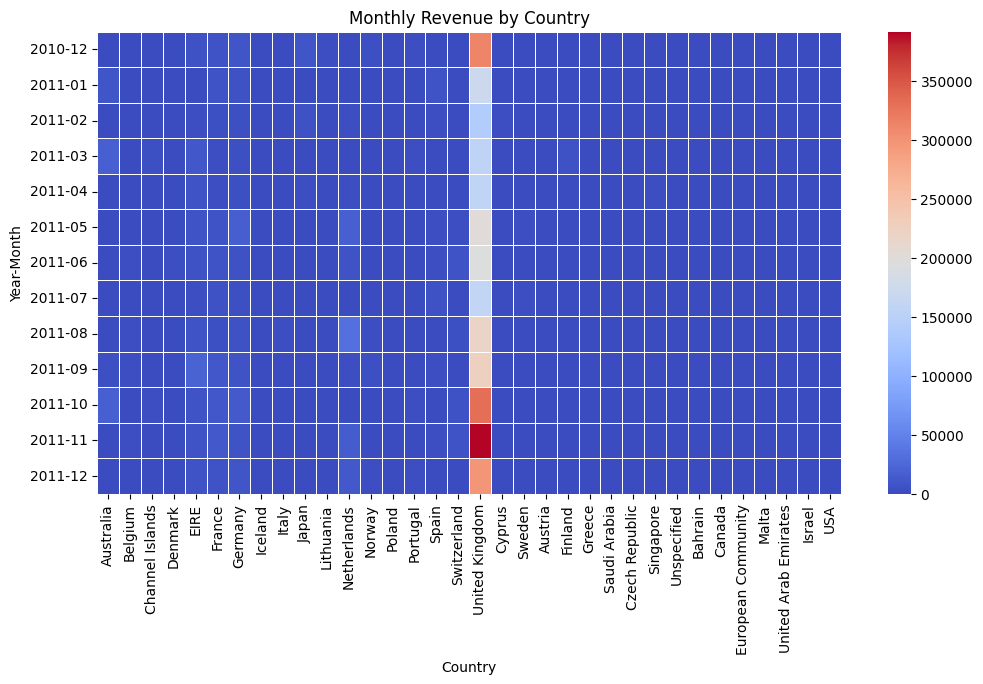

In [37]:
# Monthly Revenue Heatmap
df['YearMonth'] = df['InvoiceDate'].dt.strftime('%Y-%m')
monthly_heatmap = df.groupby(['YearMonth', 'Country'])['TotalPrice'].sum().unstack().fillna(0)
plt.figure(figsize=(12,6))
sns.heatmap(monthly_heatmap, cmap='coolwarm', linewidths=0.5)
plt.title("Monthly Revenue by Country")
plt.xlabel("Country")
plt.ylabel("Year-Month")
plt.show()